In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.bmi = df.bmi.fillna(df.bmi.mean())

In [7]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

**Basic EDA**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


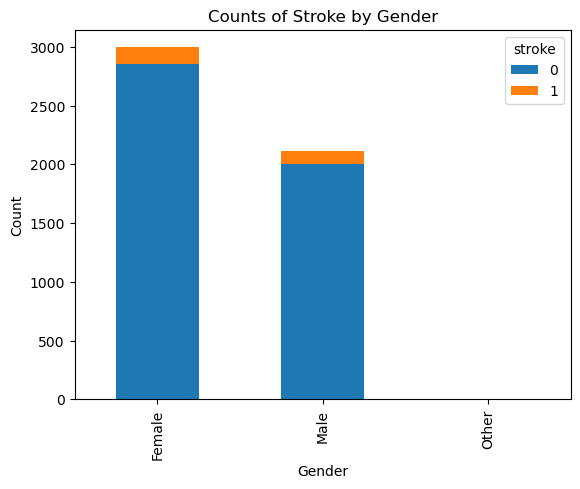

In [10]:
grouped_data = df.groupby(['gender', 'stroke']).size().unstack()

# Create the bar chart
grouped_data.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Counts of Stroke by Gender')

# Show the plot
plt.show()

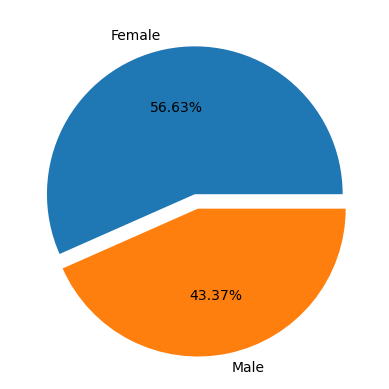

In [11]:
new_df=df[df['stroke']==1]
gender_data=list(new_df['gender'].value_counts())
plt.pie(gender_data,labels=['Female','Male'],autopct='%.2f%%',explode = [0,0.1])
plt.show()

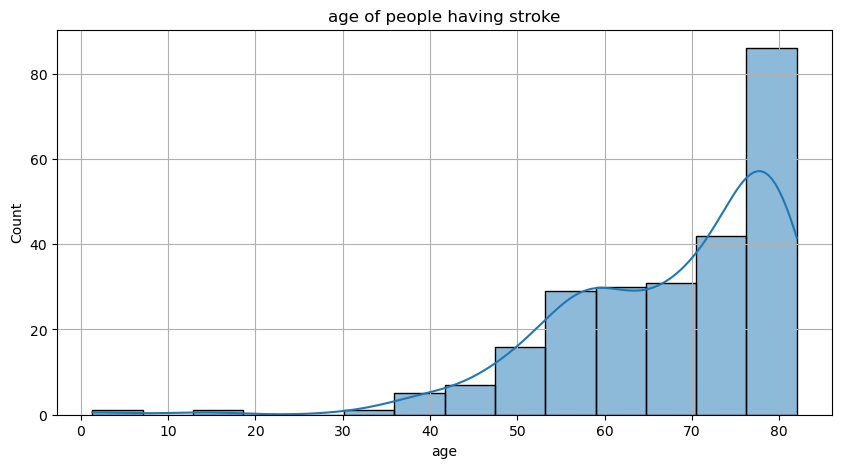

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(new_df['age'],kde=True)
plt.title("age of people having stroke")
plt.grid()

Text(0.5, 1.0, 'variance of bmi')

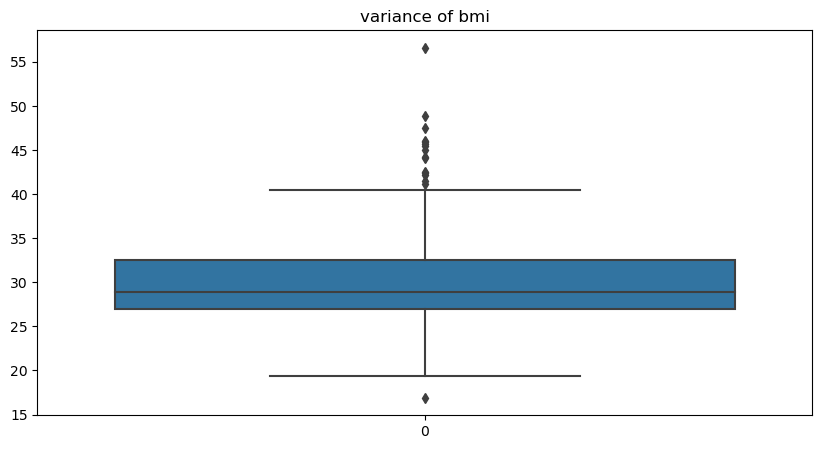

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(new_df['bmi'])
plt.title("variance of bmi")

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder()

In [15]:
d1 = df.select_dtypes(include = ['object']).columns.tolist()

In [16]:
for i in d1:
    le.fit(df[i])
    df[i] = le.transform(df[i])

**Spliting Dataset**

In [17]:
x=df.drop('stroke',axis=1)
y=df['stroke']

**Train Test Split**

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

**To resolve class imbalance issue**

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

**Linear Regression**

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

lr.fit(X_resampled, y_resampled)

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Display the Score and MSE
print(lr.score(X_resampled, y_resampled))
print('Mean Squared Error:', mse)

0.4806527508888634
Mean Squared Error: 0.1531429203831806


In [21]:
def normalize(y_pred):
    for i in range(len(y_pred)):
        if y_pred[i]>0.5:
            y_pred[i]=1
        else:
            y_pred[i]=0
    return y_pred

In [22]:
y_pred = normalize(y_pred)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       968
           1       0.12      0.52      0.20        54

    accuracy                           0.78      1022
   macro avg       0.54      0.65      0.53      1022
weighted avg       0.92      0.78      0.83      1022



**Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression()

Lr.fit(X_resampled, y_resampled)

y_pred1 = Lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)

# Display the Score and MSE
print(Lr.score(X_resampled, y_resampled))
print('Mean Squared Error:', mse)

0.7965579244798356
Mean Squared Error: 0.25244618395303325


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85       968
           1       0.13      0.65      0.21        54

    accuracy                           0.75      1022
   macro avg       0.55      0.70      0.53      1022
weighted avg       0.93      0.75      0.82      1022



**Decision Tree Classifier**

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
pred1=dtc.predict(X_test)
# Display the Score and MSE
mse = mean_squared_error(y_test, pred1)
print('Mean Squared Error:', mse)
print(dtc.score(X_test,y_test))

Mean Squared Error: 0.08512720156555773
0.9148727984344422


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       968
           1       0.15      0.13      0.14        54

    accuracy                           0.91      1022
   macro avg       0.55      0.54      0.55      1022
weighted avg       0.91      0.91      0.91      1022



**Random Forest Classifier**

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
pred2=rfc.predict(X_test)
# Display the Score and MSE
mse = mean_squared_error(y_test, pred2)
print('Mean Squared Error:', mse)
print(rfc.score(X_test,y_test))

Mean Squared Error: 0.05283757338551859
0.9471624266144814


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Naive Bayes Classification**

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb = GaussianNB()
nb.fit(X_train, y_train)
pred3 = nb.predict(X_test)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, pred3)
cr1 = classification_report(y_test, pred3)

# Display the results
print('Accuracy:', accuracy)
print('Classification Report:\n', cr1)


Accuracy: 0.9246575342465754
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       968
           1       0.27      0.26      0.27        54

    accuracy                           0.92      1022
   macro avg       0.62      0.61      0.61      1022
weighted avg       0.92      0.92      0.92      1022



**Support Vector Machine Classification**

In [31]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
pred4 = svc.predict(X_test)

accuracy = accuracy_score(y_test, pred4)
cr2 = classification_report(y_test, pred4)
# Display the results
print('Accuracy:', accuracy)
print('Classification Report:\n', cr2)

Accuracy: 0.9471624266144814
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**K Nearest Neighbours**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=4)
knc.fit(X_train, y_train)
pred5 = knc.predict(X_test)

accuracy = accuracy_score(y_test, pred5)
cr3 = classification_report(y_test, pred5)

# Display the results
print('Accuracy:', accuracy)
print('Classification Report:\n', cr3)


Accuracy: 0.9471624266144814
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Ada Boost Algorithm**

In [33]:
from sklearn.ensemble import AdaBoostClassifier

# Create a base classifier (in this case, decision tree)
base_classifier = RandomForestClassifier(max_depth=1)

# Create an AdaBoost classifier using the base classifier
adaboost = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=100, random_state=0)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)

# Predict on the test set
pred6 = adaboost.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, pred6)
print("Accuracy:", accuracy)


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9461839530332681


In [34]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.33      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.92      0.95      0.92      1022



**Gradient Boosting Classifier**

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost1 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, random_state=42)
gradient_boost1.fit(X_train, y_train)
pred7_1 = gradient_boost1.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy1 = accuracy_score(y_test, pred7_1)
print("Accuracy_classifier:", accuracy1)



Accuracy_classifier: 0.9412915851272016


**Gradient Boosting Regressor**

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost2 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
gradient_boost2.fit(X_train, y_train)
pred7_2 = gradient_boost2.predict(X_test)
pred7_2 = normalize(pred7_2)
# Evaluate the accuracy of the classifier
accuracy2 = accuracy_score(y_test, pred7_2)
print("Accuracy_regressor:", accuracy2)

Accuracy_regressor: 0.9383561643835616


**Classifier better than Regressor**

In [37]:
print(classification_report(y_test,pred7_1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.29      0.07      0.12        54

    accuracy                           0.94      1022
   macro avg       0.62      0.53      0.54      1022
weighted avg       0.92      0.94      0.92      1022



In [38]:
print(classification_report(y_test,pred7_2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.15      0.04      0.06        54

    accuracy                           0.94      1022
   macro avg       0.55      0.51      0.51      1022
weighted avg       0.91      0.94      0.92      1022



**XGBoost**

In [39]:
import xgboost as xgb
# Convert the data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'eta': 0.1,
    'seed': 42
}

# Train the XGBoost classifier
num_rounds = 1000
xgb_model = xgb.train(params, dtrain, num_rounds)

# Predict on the test set
pred8 = xgb_model.predict(dtest)
pred8 = [round(value) for value in pred8]

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, pred8)
print("Accuracy:", accuracy)


Accuracy: 0.9432485322896281


In [40]:
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.30      0.06      0.09        54

    accuracy                           0.94      1022
   macro avg       0.62      0.52      0.53      1022
weighted avg       0.92      0.94      0.92      1022

